In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr
import yaml

import kdephys.hypno as kh
import kdephys.pd as kpd
import kdephys.xr as kx
import kdephys.utils as ku


import acr.subjects as subs
import acr
import acr.utils as acu
import plotly.express as px
plt.style.use('acr_plots.mplstyle')

/home/kdriessen/github_t2/kdephys/kdephys/xr/utils.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [39]:
def get_all_tank_keys(root):
    tanks = []
    for f in os.listdir(root):
        full_path = os.path.join(root, f)
        if os.path.isdir(full_path):
            full_path = Path(full_path)
            tanks.append(full_path)
    tank_keys = []
    for tp in tanks:
        tp = os.path.split(tp)[1]
        tps = tp.split('-')
        tps = tps[1:]
        tps = '-'.join(tps)
        tank_keys.append(tps)
    return tank_keys

In [40]:
t = get_all_tank_keys(root)

In [41]:
t

['post-exp-rec',
 'mon1',
 'control1-bl',
 'laser1-bl',
 'mon2',
 'laser1',
 'disconnection',
 'control1',
 'pulse-exp']

In [43]:
root = f'/Volumes/opto_loc/Data/ACR_12/'
a12 = {}
a12['subject'] = 'ACR_12'
a12['complete_key_list'] = get_all_tank_keys(root)

In [45]:
times = acr.utils.get_rec_times(a12)

read from t=0s to t=1557.03s
read from t=0s to t=2982.67s
read from t=0s to t=1679.86s
read from t=0s to t=1572.34s
read from t=0s to t=2589.87s
read from t=0s to t=1651.55s
read from t=0s to t=510.5s
read from t=0s to t=1617.32s
read from t=0s to t=1567.1s


In [48]:
times['mon1'][0]

numpy.datetime64('2022-08-05T14:28:31.999999')

In [49]:
starts = []
ends = []
for k in times.keys():
    starts.append(times[k][0])
    ends.append(times[k][1])


In [53]:
# order a list of datetime objects chronologically
starts.sort()
ends.sort()

In [55]:
# get the first start and last end
start = starts[0]
end = ends[-1]
# construct a datetime range 
dr = pd.date_range(start, end, freq='1H')
dr

DatetimeIndex(['2022-08-05 14:28:31.999999', '2022-08-05 15:28:31.999999',
               '2022-08-05 16:28:31.999999', '2022-08-05 17:28:31.999999',
               '2022-08-05 18:28:31.999999', '2022-08-05 19:28:31.999999',
               '2022-08-05 20:28:31.999999', '2022-08-05 21:28:31.999999',
               '2022-08-05 22:28:31.999999', '2022-08-05 23:28:31.999999',
               ...
               '2022-09-06 06:28:31.999999', '2022-09-06 07:28:31.999999',
               '2022-09-06 08:28:31.999999', '2022-09-06 09:28:31.999999',
               '2022-09-06 10:28:31.999999', '2022-09-06 11:28:31.999999',
               '2022-09-06 12:28:31.999999', '2022-09-06 13:28:31.999999',
               '2022-09-06 14:28:31.999999', '2022-09-06 15:28:31.999999'],
              dtype='datetime64[ns]', length=770, freq='H')

In [79]:
from itertools import cycle
it = cycle(range(2, 4, 1))
for c in colors:
    next(it)
    print(it)
    print(c)

red
blue
green
orange
purple
black
yellow
pink
brown
gray
olive
cyan


In [87]:
# get the value of the next iterator
3 == next(it)


True

(1.1, 8.0)

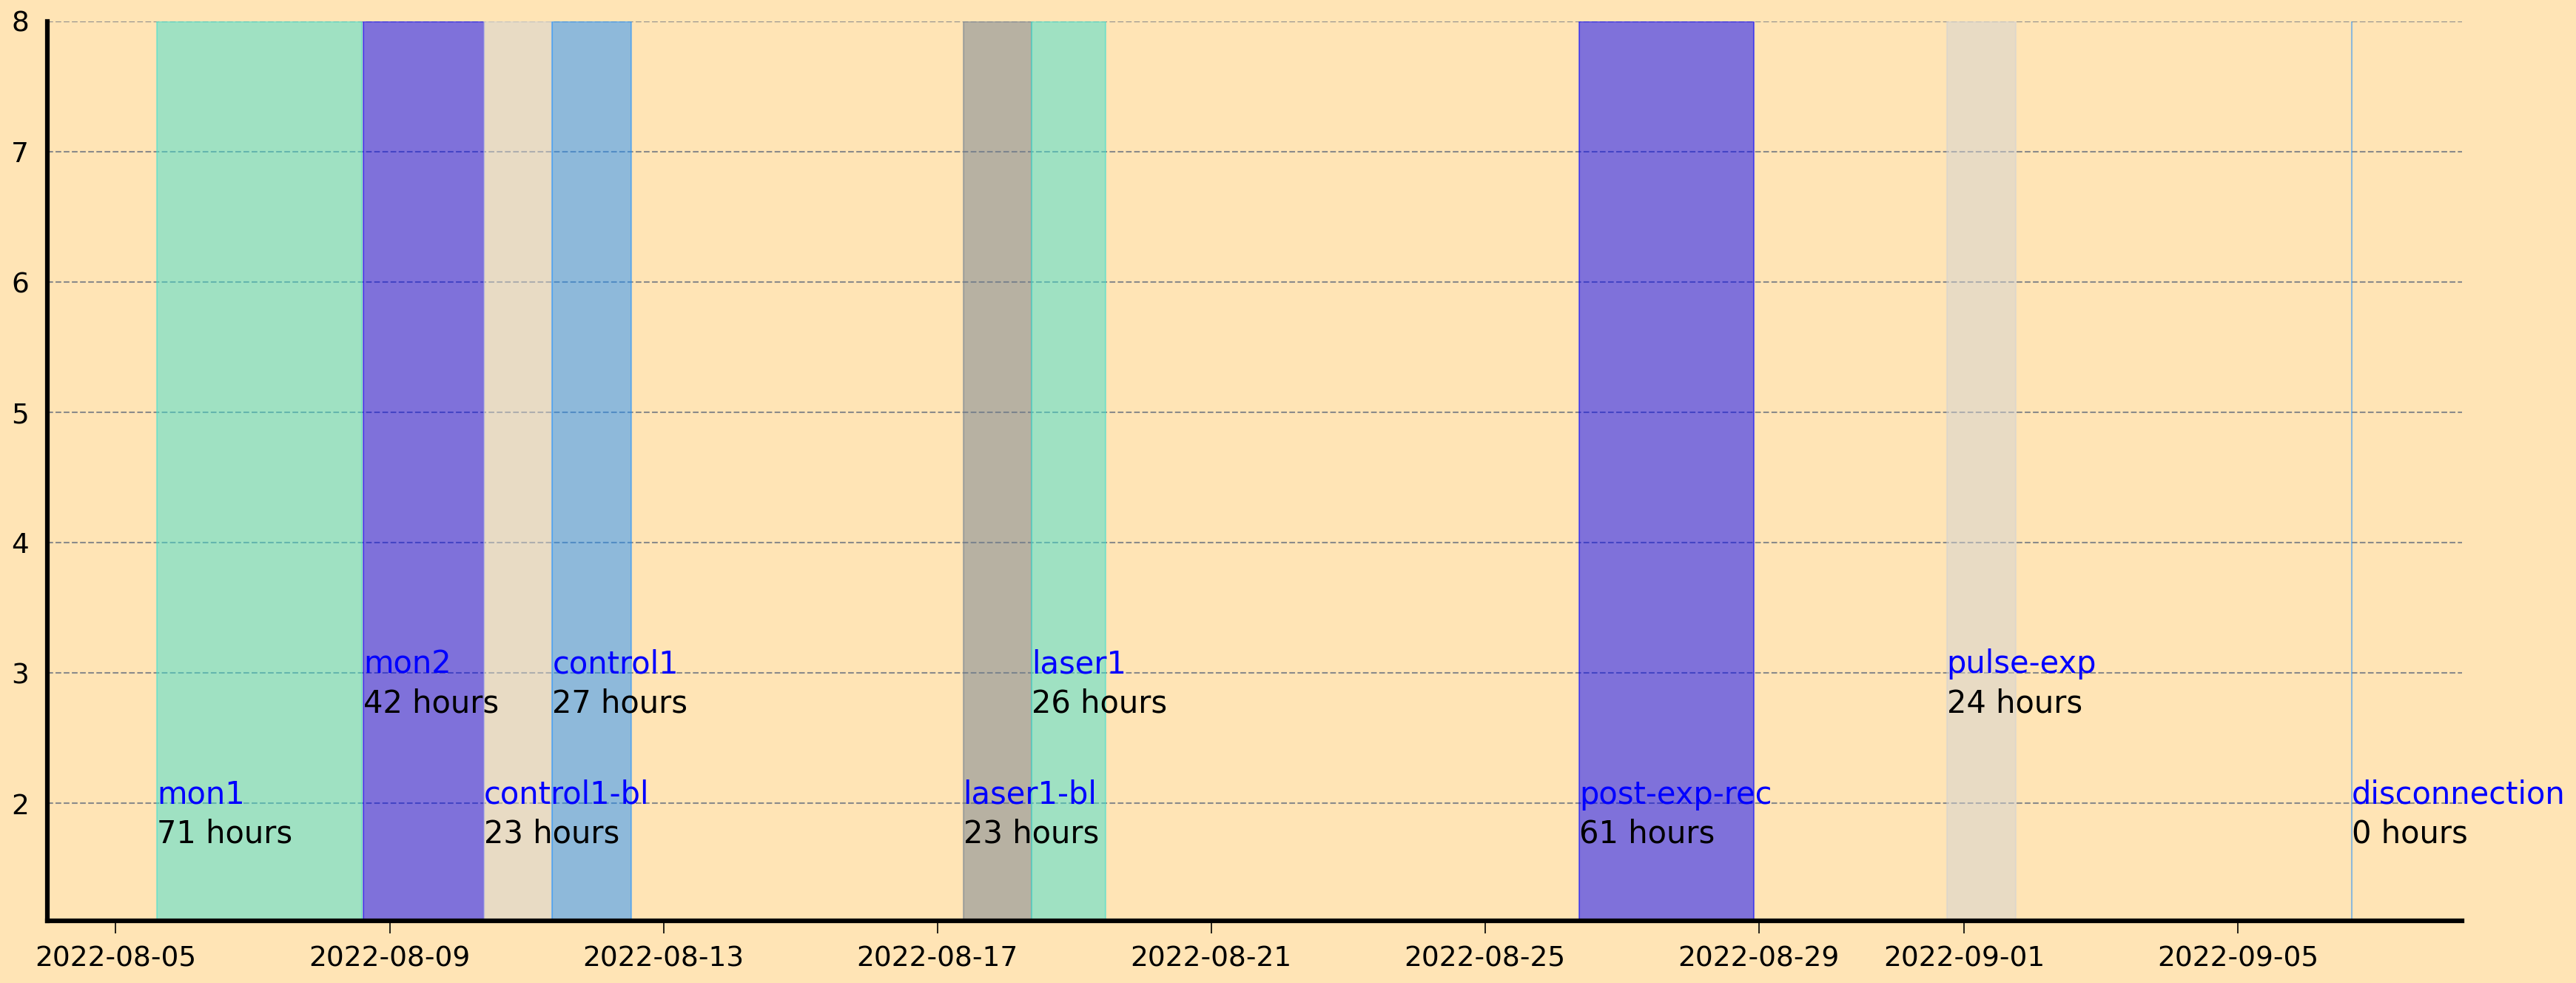

In [101]:
from itertools import cycle
it = cycle(range(2, 4, 1))
colors = ['turquoise', 'blue', 'lightgrey', 'dodgerblue', 'slategrey', 'turquoise', 'blue', 'lightgrey', 'dodgerblue', 'slategrey']
f, ax = plt.subplots(figsize=(25, 10))
ax.plot(dr, np.ones(len(dr)), 'o', color='moccasin', markersize=1)
for s, e, c in zip(starts, ends, colors):
    duration = e-s
    duration = np.timedelta64(duration, 'h')
    duration = str(duration)
    ax.axvspan(s, e, alpha=0.5, color=c)
    for k in times.keys():
        if s == times[k][0]:
            y = next(it)
            ax.text(s, y, k, fontsize=20, color='b')
            ax.text(s, y-0.3, duration, fontsize=20, color='k')
ax.set_ylim(1.1, 8)